# Rede neural com uma camadas escondida - Exercício manual

<img src='../figures/rede_neural_exercicio_manual.png' width="600"></img>

## Importando as bibliotecas

In [1]:
%matplotlib inline
from sklearn import datasets
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn

## Leitura, normalização e visualização dos dados

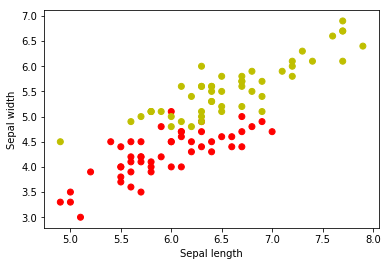

In [2]:
n_samples = 150
iris = datasets.load_iris()
Y = iris.target - 1
X = iris.data[Y>=0,:3]  # comprimento das sépalas e pétalas, indices 0, 1 e 2
Y = Y[Y>=0]
colors = np.array(['r','y','b'])
plt.scatter(X[:, 0], X[:, 2], c=colors[Y])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### Prepara os dados para o PyTorch

In [3]:
X_tensor = torch.FloatTensor(X)
Y_tensor = torch.LongTensor(Y)

## Construindo o modelo da rede

In [4]:
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.linear1 = nn.Linear(3, 4)
        self.linear2 = nn.Linear(4, 2)
    
    def forward(self, x):
        x = self.linear1(x)
        x = nn.functional.relu(x)
        x = self.linear2(x)
        return x
    
model = Modelo()
print(model)

Modelo(
  (linear1): Linear(in_features=3, out_features=4, bias=True)
  (linear2): Linear(in_features=4, out_features=2, bias=True)
)


## Fazendo um predict para testar

In [5]:
X[:1,:]

array([[ 7. ,  3.2,  4.7]])

In [5]:
z = model(X_tensor[:2,:])
z

tensor([[-0.0494, -0.4333],
        [-0.0494, -0.4333]], grad_fn=<ThAddmmBackward>)

## Treinamento

In [6]:
lr = 0.015

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

criterion = nn.CrossEntropyLoss()

### Laço principal de treinamento

In [7]:
nb_epoch = 3000

losses = []
for i in range(nb_epoch):
    # predict da rede
    output = model(X_tensor)

    loss = criterion(output, Y_tensor)

    # zero, backpropagation gradient, atualiza param gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
print('Final loss:', loss.item())

Final loss: 0.1785212755203247


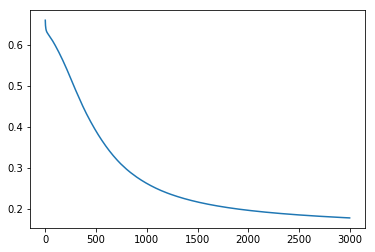

In [9]:
plt.plot(losses);

## Avaliação

### Imprimindo pesos finais

In [10]:
for name, w in model.state_dict().items():
    print('{:16}{}'.format(name, w.size()))
    if len(w.size()) > 1:
        print(w.t())
    else:
        print(w)

linear1.weight  torch.Size([4, 3])
tensor([[ 0.0289, -0.3011, -0.0569, -0.9911],
        [-0.5437,  0.3198, -0.5688, -0.7724],
        [-0.4886, -0.0117,  0.0208,  2.0878]])
linear1.bias    torch.Size([4])
tensor([-0.1853,  0.2065,  0.0184, -0.8634])
linear2.weight  torch.Size([2, 4])
tensor([[-0.0733,  0.1040],
        [-0.1182,  0.4546],
        [ 0.0576,  0.2068],
        [-1.9783,  1.6020]])
linear2.bias    torch.Size([2])
tensor([ 1.3763, -1.8590])


### Avaliação do classificador

In [12]:
def predict(model, inputs):
    outputs = model(inputs)
    _, predicts = torch.max(outputs, 1)
    
    return predicts.data.numpy()

In [13]:
Y_hat = predict(model, X_tensor)
accuracy = (Y_hat == Y).mean()
print() 
print('Training Accuracy: ', accuracy)


Training Accuracy:  0.94


### Matriz de confusão

In [14]:
import pandas as pd
pd.crosstab(Y_hat, Y)

col_0,0,1
row_0,,
0,48,4
1,2,46


## Atividades

### Experimentos:

1. Simule na mão, com o auxílio da figura, o cálculo do score z para algumas amostras

In [16]:
xin = X_tensor[:1,:]
print(xin)
z = model(xin)
print(z)

tensor([[7.0000, 3.2000, 4.7000]])
tensor([[ 1.3763, -1.8590]], grad_fn=<ThAddmmBackward>)


## Principais aprendizados